# Backprogation in NeuralNetworks

As the Title suggets in this blog post I would try to tackle `backpropagation in neural networks`.
We will be using `numpy` for our calculations for this particular post. 

I will assume that you all know what a artificial neural network is and have a little bit of knowledge about `forward and backward propagation`. Just having a simple idea is enough.

If you do not know what the above terms are or would like to brush up on the topics , I would suggest this amazing [youtube playlist by 3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi).

> youtube: https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

In [41]:
import numpy as np
import gzip
import pickle
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Preparing the data

For this blog post, we'll use one of the most famous datasets in computer vision, [MNIST](https://en.wikipedia.org/wiki/MNIST_database). MNIST contains images of handwritten digits, collected by the National Institute of Standards and Technology and collated into a machine learning dataset by Yann Lecun and his colleagues. Lecun used MNIST in 1998 in [Lenet-5](http://yann.lecun.com/exdb/lenet/), the first computer system to demonstrate practically useful recognition of handwritten digit sequences. This was one of the most important breakthroughs in the history of AI.

Run the code below to download the `MNIST` dataset. The dataset will be downloaded to the path `../../Datasets/` or you can modify the path as you like.

In [ ]:
!wget -P "../../Datasets/" http://deeplearning.net/data/mnist/mnist.pkl.gz

In [3]:
def get_data(path):
    """
    Fn to unzip the MNIST data and return
    the data as numpy arrays
    """
    with gzip.open(path, 'rb') as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
    return map(np.array, (x_train,y_train,x_valid,y_valid))

In [4]:
x_train,y_train,x_valid,y_valid = get_data(path= "../../Datasets/mnist.pkl.gz")

In [5]:
tots,feats = x_train.shape
print("Shape of x_train:",x_train.shape)
print("Total number of examples:", tots)
print("Number of pixel values per image:", feats)

Shape of x_train: (50000, 784)
Total number of examples: 50000
Number of pixel values per image: 784


Let's view one image from our dataset:

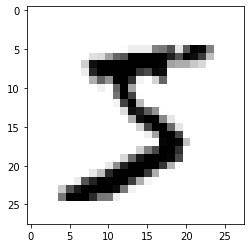

In [7]:
plt.imshow(x_train[0].reshape(28,28), cmap="binary");

## Basic Model Architecture

For this task we are going to use a very basic model architecture this 2 linear layers and a output layer with 10 outputs.

In [8]:
#hide_input
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

Our forward pass of the model is going to look something like this:

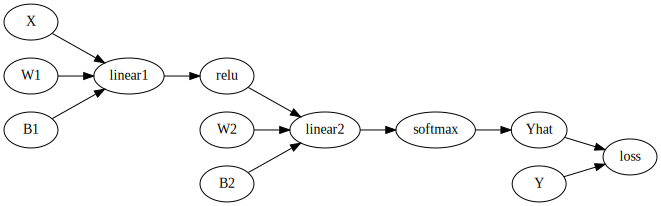

In [39]:
#hide_input
gv('''
X->linear1->relu->linear2->softmax->Yhat->loss
W1->linear1
B1->linear1
W2->linear2
B2->linear2
Y->loss
''')

Consequently our backward pass will look something like this:

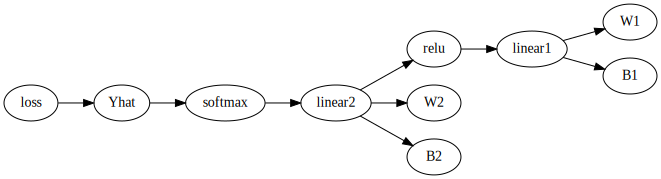

In [40]:
#hide_input
gv('''
loss->Yhat->softmax->linear2->relu->linear1
linear1->W1
linear1->B1
linear2->W2
linear2->B2
''')